#Parks Special Events


Event and attendance information from special events facilitated by NYC Parks' "Public Programs" division, including fitness, sports, dancing, movies, and concerts.

* Last Updated: July 21, 2023
* Date Created: October 31, 2018
* Data Provided by: Department of Parks and Recreation (DPR)
* [Source](https://data.cityofnewyork.us/Recreation/Parks-Special-Events/6v4b-5gp4/about_data)

`Unit`	Name of unit that performed/organized the event(Text)

`Group Name/Partner`	Name of group that requested the event or partner that helped organize the event(Text)

`DateTime` Date and time of the event	Floating Timestamp

`Borough`	Borough in which the event was held	(Text)

`LocationType`	Type of location where event was held(Text)

`Location`	Name of specific location where event was held	(Text)

`Event Name`	Name of event as given by the employee(Text)

`Event Type`	Type of event that took place	(Text)

`Category`	Further description of the event type	(Text)

`Classification`	Description that further identified the event based on category	(Text)

`Attendance`	Number of participants who attended the event	(Number)

`Audience`	Population participating in the event	(Text)


---




## Data Preprocessing

In [109]:
import pandas as pd

In [110]:
df = pd.read_csv("/content/Parks_Special_Events.csv")
df

,Unit,Group Name/Partner,Date and Time,Borough,LocationType,Location,Event Name,Event Type,Category,Classification,Attendance,Audience
0,Recreation,NaN,04/12/2018 06:30:00 PM,Manhattan,Recreation Center,Alfred E. Smith Recreation Center,Battle of the Paddles Special Event,Tournament/Competition,Sport,NaN,60.0,Adults;#Seniors;#Young Adult
1,Recreation,NaN,01/20/2018 12:00:00 AM,Manhattan,Recreation Center,Alfred E. Smith Recreation Center,Event New Year Ultimate Fitness Frenzy,Local Event,Fitness,NaN,50.0,Teens;#Young Adult;#Adults;#Seniors
2,Recreation,NaN,06/11/2018 10:00:00 AM,Bronx,Park,Poe Park,Youth Arts Festival,Community Based Event,Mobile Unit,Play,150.0,Children;#General Public
3,Recreation,Musuem of Chinese in America,06/07/2019 07:00:00 PM,Manhattan,Park,Columbus Park,Movie: Kung Fu Panda,Community Based Event,Mobile Unit,M.U.T.S,325.0,Children;#Young Adult;#General Public
4,Recreation,NaN,06/08/2019 11:00:00 AM,Manhattan,Recreation Center,Pelham Fritz Recreation Center,"Live, Laugh, Love Fitness Expo",Agency Produced Event,Fitness,Fitness,166.0,General Public;#Adults;#Young Adult;#Seniors
...,...,...,...,...,...,...,...,...,...,...,...,...
7368,NaN,NaN,06/30/2023 03:00:00 PM,Bronx,NaN,Joyce Kilmer Park,Playmobile,NaN,Mobile Unit,Play,200.0,NaN
7369,NaN,NaN,06/30/2023 03:00:00 PM,Bronx,NaN,Joyce Kilmer Park,Family Day,NaN,Family Festival,Music,250.0,NaN
7370,NaN,NaN,06/30/2023 06:00:00 PM,Queens,NaN,Juniper Valley Park,Water Festival,NaN,Family Festival,Music,570.0,NaN
7371,NaN,NaN,06/30/2023 08:45:00 PM,Manhattan,NaN,Tecumseh Playground,Movies Under the Stars: The Woman King,NaN,Mobile Unit,M.U.T.S,72.0,NaN


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7373 entries, 0 to 7372
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unit                5529 non-null   object 
 1   Group Name/Partner  3306 non-null   object 
 2   Date and Time       7373 non-null   object 
 3   Borough             7373 non-null   object 
 4   LocationType        5529 non-null   object 
 5   Location            7373 non-null   object 
 6   Event Name          7272 non-null   object 
 7   Event Type          5529 non-null   object 
 8   Category            7373 non-null   object 
 9   Classification      6896 non-null   object 
 10  Attendance          7304 non-null   float64
 11  Audience            5529 non-null   object 
dtypes: float64(1), object(11)
memory usage: 691.3+ KB


In [112]:
df.isna().sum()

,0
Unit,1844
Group Name/Partner,4067
Date and Time,0
Borough,0
LocationType,1844
Location,0
Event Name,101
Event Type,1844
Category,0
Classification,477


In [113]:
df['Attendance'] = df['Attendance'].fillna(df.groupby(['LocationType', 'Event Type'])['Attendance'].transform('mean'))

In [114]:
df['Attendance'].isna().sum() #the up cell not work well

62

In [115]:
df = df.dropna(subset=['Attendance']) #if there is no attendance we can't predict the crowding, so i will drop it

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7311 entries, 0 to 7372
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unit                5529 non-null   object 
 1   Group Name/Partner  3286 non-null   object 
 2   Date and Time       7311 non-null   object 
 3   Borough             7311 non-null   object 
 4   LocationType        5529 non-null   object 
 5   Location            7311 non-null   object 
 6   Event Name          7212 non-null   object 
 7   Event Type          5529 non-null   object 
 8   Category            7311 non-null   object 
 9   Classification      6834 non-null   object 
 10  Attendance          7311 non-null   float64
 11  Audience            5529 non-null   object 
dtypes: float64(1), object(11)
memory usage: 742.5+ KB


In [117]:
df['Audience'].value_counts()

,count
Audience,
General Public,2840
Children,316
Tot;#Children;#Teens,195
Children;#Teens,151
Adults,149
...,...
Young Adult;#Adults;#Adaptive;#Seniors,1
Tot;#Young Adult;#Children;#Adults;#Teens;#General Public;#Seniors;#Adaptive,1
Teens;#Tot;#Children,1


In [118]:
df['Group Name/Partner'] = df['Group Name/Partner'].fillna("NYC Parks (Public Programs)")

<ipython-input-118-09541639e123>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Group Name/Partner'] = df['Group Name/Partner'].fillna("NYC Parks (Public Programs)")


In [119]:
df['LocationType'] = df['LocationType'].fillna('Other')

<ipython-input-119-36abb4c606ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LocationType'] = df['LocationType'].fillna('Other')


In [120]:
df['Classification'] = df['Classification'].fillna('Other')

<ipython-input-120-b7a27c17e699>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Classification'] = df['Classification'].fillna('Other')


In [121]:
def fill_with_mode(series):
    mode_value = series.mode()
    if not mode_value.empty:
        return series.fillna(mode_value[0])
    return series

In [122]:
df['Event Type'] = df.groupby(['Event Name', 'LocationType'])['Event Type'].transform(fill_with_mode)

df['Event Type'] = df.groupby(['Event Name'])['Event Type'].transform(fill_with_mode)

df['Event Type'] = df['Event Type'].transform(fill_with_mode)

<ipython-input-122-16f93f57ef76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event Type'] = df.groupby(['Event Name', 'LocationType'])['Event Type'].transform(fill_with_mode)
<ipython-input-122-16f93f57ef76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event Type'] = df.groupby(['Event Name'])['Event Type'].transform(fill_with_mode)
<ipython-input-122-16f93f57ef76>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [123]:
df['Unit'] = df.groupby(['Event Type'])['Unit'].transform(fill_with_mode)

df['Unit'] = df['Unit'].transform(fill_with_mode)

<ipython-input-123-52f4fe0477dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Unit'] = df.groupby(['Event Type'])['Unit'].transform(fill_with_mode)
<ipython-input-123-52f4fe0477dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Unit'] = df['Unit'].transform(fill_with_mode)


In [124]:
df['Audience'] = df.groupby(['Event Name', 'Classification'])['Audience'].transform(fill_with_mode)
df['Audience'] = df.groupby(['Event Name'])['Audience'].transform(fill_with_mode)

df['Audience'] = df['Audience'].transform(fill_with_mode)

<ipython-input-124-4cbfe155ca93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Audience'] = df.groupby(['Event Name', 'Classification'])['Audience'].transform(fill_with_mode)
<ipython-input-124-4cbfe155ca93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Audience'] = df.groupby(['Event Name'])['Audience'].transform(fill_with_mode)
<ipython-input-124-4cbfe155ca93>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [125]:
df.loc[df['Event Name'].isna() | (df['Event Name'] == ''), 'Event Name'] = df['Event Type'] + ' at ' + df['Location']

In [126]:
df.isna().sum()

,0
Unit,0
Group Name/Partner,0
Date and Time,0
Borough,0
LocationType,0
Location,0
Event Name,0
Event Type,0
Category,0
Classification,0


In [127]:
df['Attendance'] = df['Attendance'].astype(int)

<ipython-input-127-303edc267347>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attendance'] = df['Attendance'].astype(int)


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7311 entries, 0 to 7372
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unit                7311 non-null   object
 1   Group Name/Partner  7311 non-null   object
 2   Date and Time       7311 non-null   object
 3   Borough             7311 non-null   object
 4   LocationType        7311 non-null   object
 5   Location            7311 non-null   object
 6   Event Name          7311 non-null   object
 7   Event Type          7311 non-null   object
 8   Category            7311 non-null   object
 9   Classification      7311 non-null   object
 10  Attendance          7311 non-null   int64 
 11  Audience            7311 non-null   object
dtypes: int64(1), object(11)
memory usage: 1000.6+ KB


In [129]:
df.sample(20)

,Unit,Group Name/Partner,Date and Time,Borough,LocationType,Location,Event Name,Event Type,Category,Classification,Attendance,Audience
4252,Recreation,NYC Parks (Public Programs),06/27/2021 09:00:00 PM,Brooklyn,Park,Cooper Park,Movies Under the Stars,Community Based Event,Mobile Unit,M.U.T.S,90,General Public
3091,Recreation,Council Member Rivera,08/03/2018 12:00:00 PM,Manhattan,Park,Tompkins Square Park,Family Fun Day,Community Based Event,Family Festival,Play,415,General Public
7336,Recreation,DYCD,06/24/2023 04:00:00 PM,Brooklyn,Other,McCarren Play Center,Saturday Night Lights,Community Based Event,Saturday Night Lights,--None--,29,General Public
3752,Urban Park Rangers,General Public,09/15/2020 01:40:00 PM,Bronx,Playground,Ben Abrams Playground,Ranger Games and Stick Bug Fun,Agency Produced Event,Nature,Summer 2020,11,Tot;#Children;#Adults;#General Public
1413,Recreation,NYPD Community Affairs,12/22/2019 09:00:00 AM,Queens,Recreation Center,Al Oerter Recreation Center,Breakfast with Santa,Community Based Event,Family Festival,Other,50,Children
1481,Recreation,NYC Parks (Public Programs),02/18/2020 06:00:00 PM,Manhattan,Recreation Center,Alfred E. Smith Recreation Center,King of the Net,Tournament/Competition,Sport,Tier 2,13,Teens
1365,Recreation,NYC Parks and Recreation,11/16/2019 09:00:00 AM,Queens,Recreation Center,Al Oerter Recreation Center,NYC Parks Pickleball Tournement,Community Based Event,Sport,Tier 3,38,Seniors;#Adults
202,Recreation,CM Constantinides,06/22/2019 08:30:00 PM,Queens,Park,Astoria Heights Park,Ralph Breaks the Internet,Community Based Event,Mobile Unit,M.U.T.S,200,General Public
5327,Recreation,Queens Recreation,11/12/2018 10:00:00 AM,Queens,Other,Beach 32nd Street,Girl's Flag Football Invitational,Community Based Event,Sport,Play,80,Teens;#Children
3113,Recreation,NYC Parks (Public Programs),08/18/2020 11:00:00 AM,Queens,Park,Queensbridge Park,Kids In Motion,Community Based Event,KIM,Summer 2020,24,Children;#Tot;#General Public


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7311 entries, 0 to 7372
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unit                7311 non-null   object
 1   Group Name/Partner  7311 non-null   object
 2   Date and Time       7311 non-null   object
 3   Borough             7311 non-null   object
 4   LocationType        7311 non-null   object
 5   Location            7311 non-null   object
 6   Event Name          7311 non-null   object
 7   Event Type          7311 non-null   object
 8   Category            7311 non-null   object
 9   Classification      7311 non-null   object
 10  Attendance          7311 non-null   int64 
 11  Audience            7311 non-null   object
dtypes: int64(1), object(11)
memory usage: 1000.6+ KB


In [131]:
df['Date and Time'] = pd.to_datetime(df['Date and Time'])
df['Date'] = df['Date and Time'].dt.date
df['Time'] = df['Date and Time'].dt.time
df['day'] = df['Date and Time'].dt.dayofweek
df['Month'] = df['Date and Time'].dt.month


df = df.drop('Date and Time', axis=1)

<ipython-input-131-43b64a52d579>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date and Time'] = pd.to_datetime(df['Date and Time'])
<ipython-input-131-43b64a52d579>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date and Time'] = pd.to_datetime(df['Date and Time'])
<ipython-input-131-43b64a52d579>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']

In [133]:
df.sample()

,Unit,Group Name/Partner,Borough,LocationType,Location,Event Name,Event Type,Category,Classification,Attendance,Audience,Date,Time,day,Month
4919,Recreation,NYC Parks (Public Programs),Brooklyn,Park,Carroll Park,The Edge of Seventeen (2016),Community Based Event,Mobile Unit,M.U.T.S,0,General Public,2021-09-17,19:15:00,4,9


### EDA

In [138]:
from matplotlib import pyplot as plt
import seaborn as sns

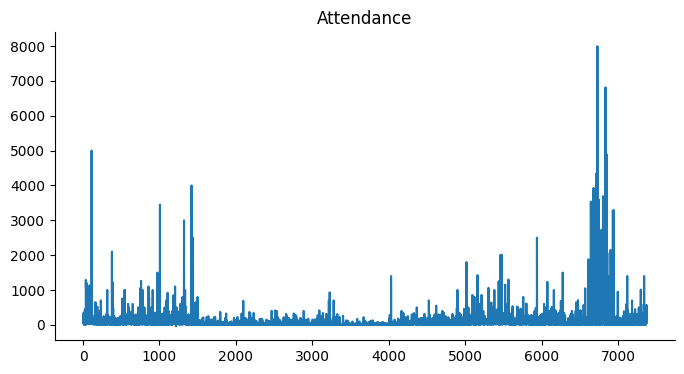

In [139]:
df['Attendance'].plot(kind='line', figsize=(8, 4), title='Attendance')
plt.gca().spines[['top', 'right']].set_visible(False)

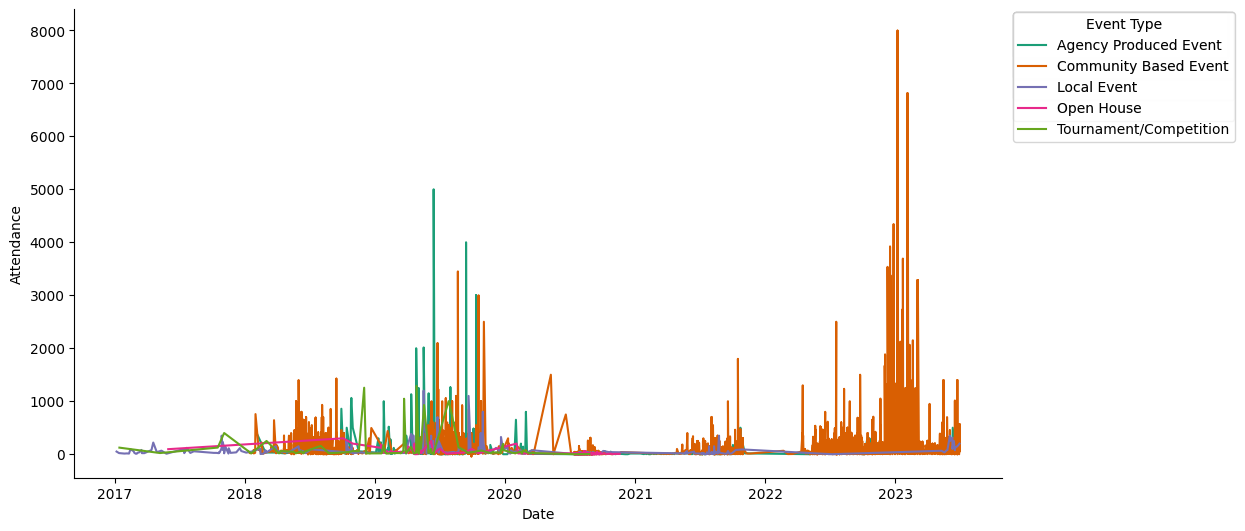

In [141]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Attendance']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Event Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Event Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Attendance')

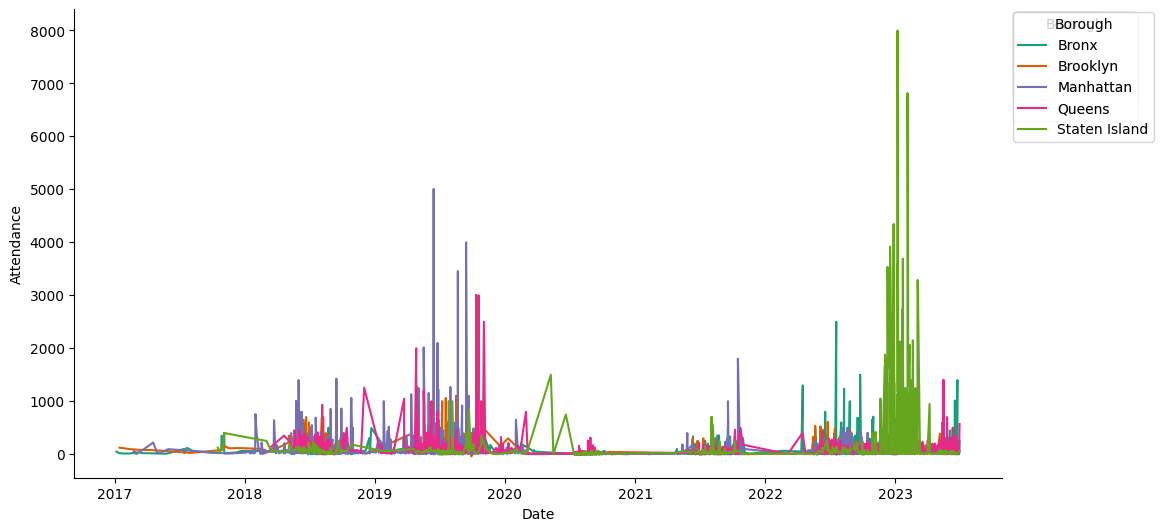

In [142]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Attendance']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Borough')):
  _plot_series(series, series_name, i)
  fig.legend(title='Borough', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Attendance')

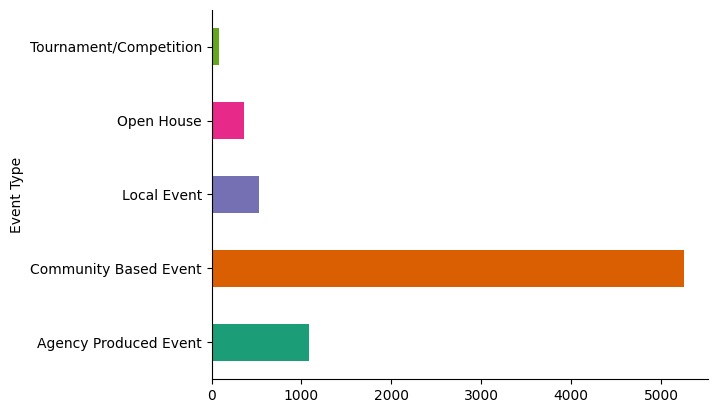

In [143]:
df.groupby('Event Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

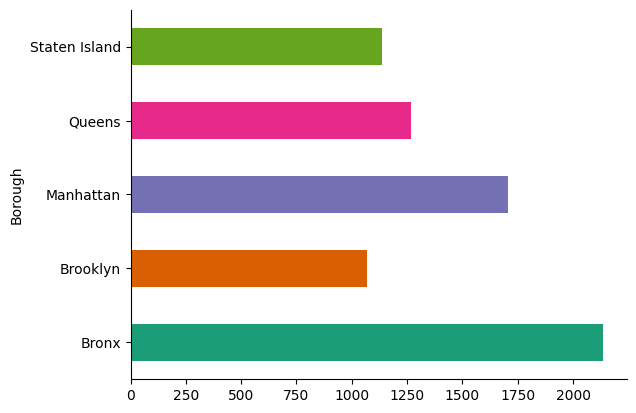

In [144]:
df.groupby('Borough').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

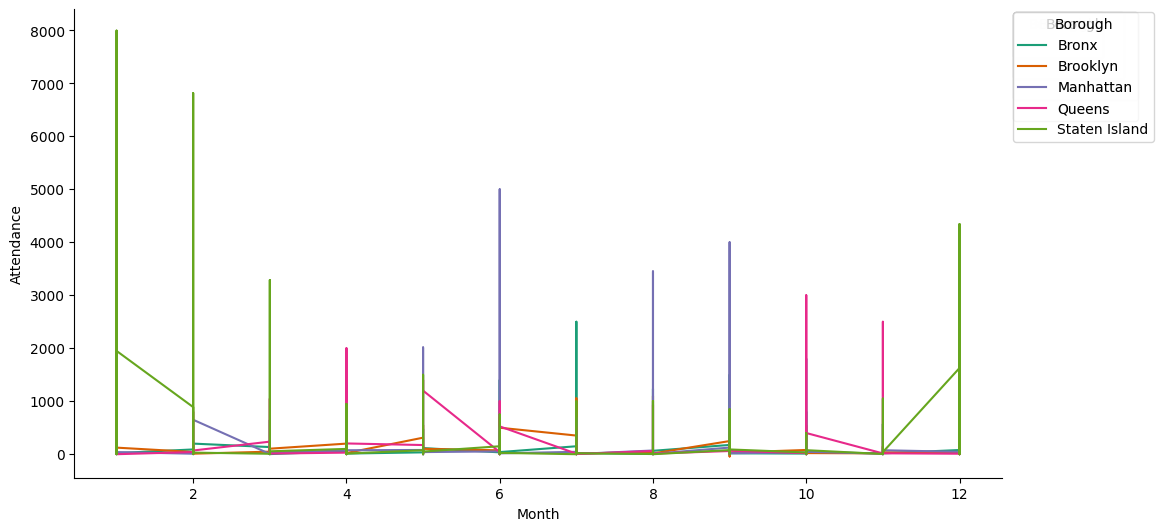

In [145]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Month']
  ys = series['Attendance']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Month', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Borough')):
  _plot_series(series, series_name, i)
  fig.legend(title='Borough', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Month')
_ = plt.ylabel('Attendance')

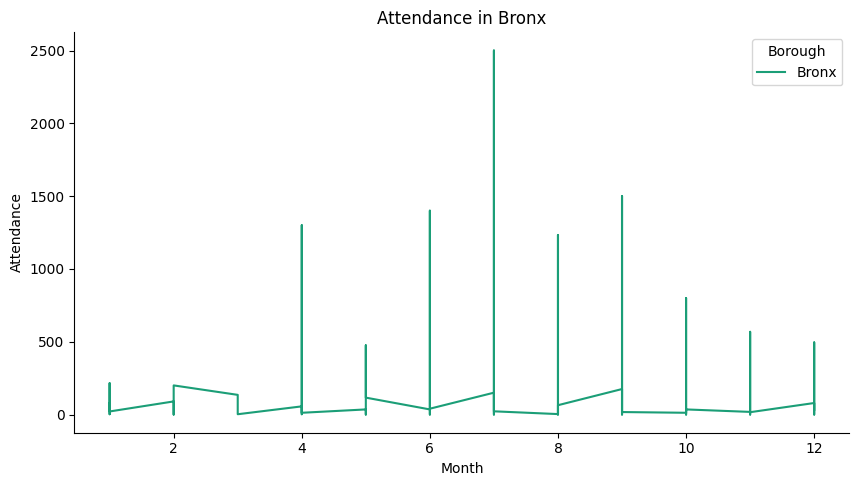

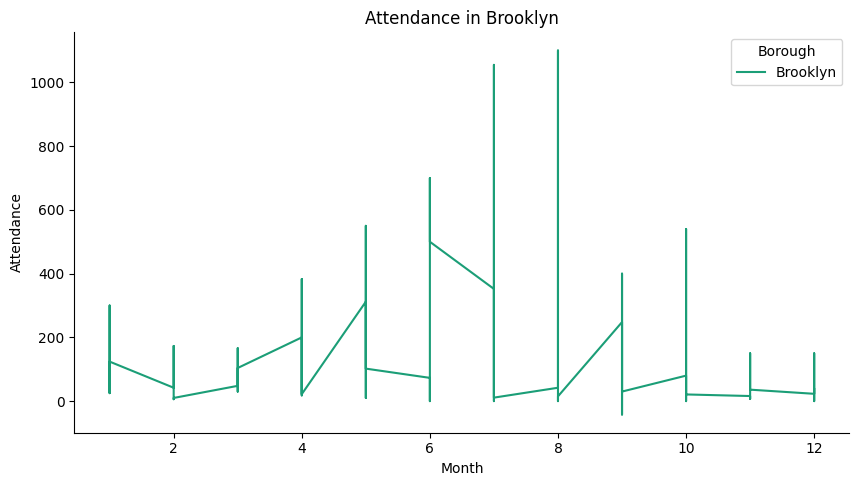

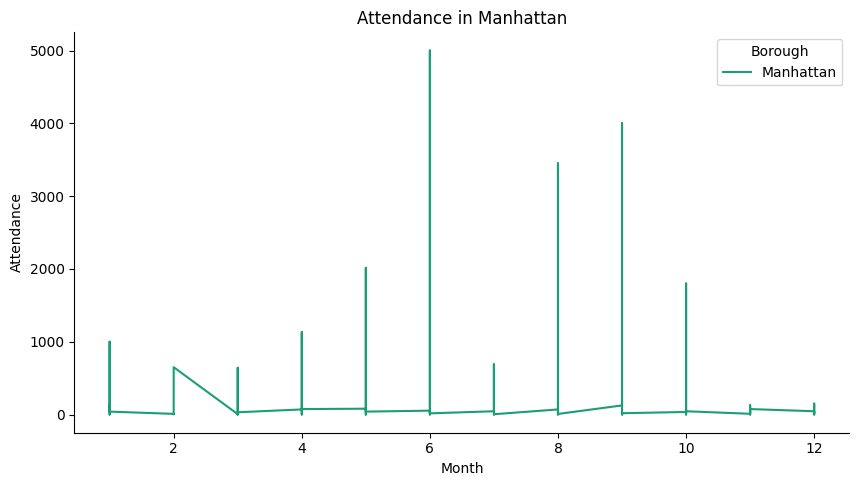

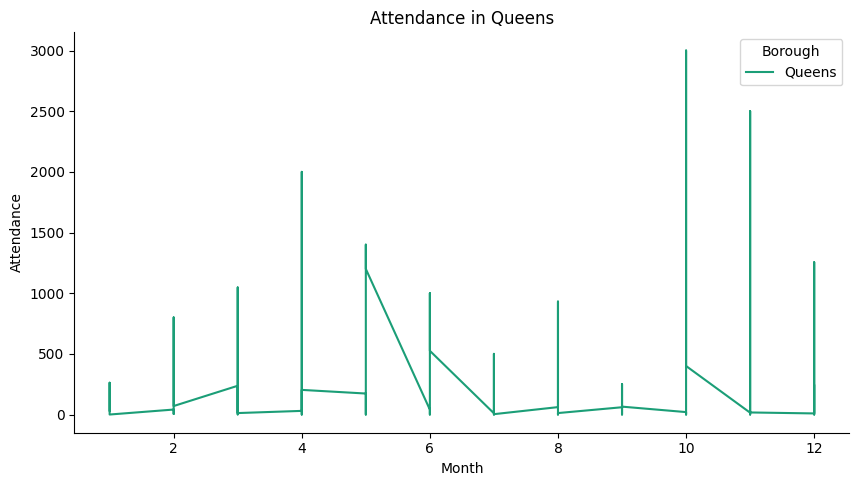

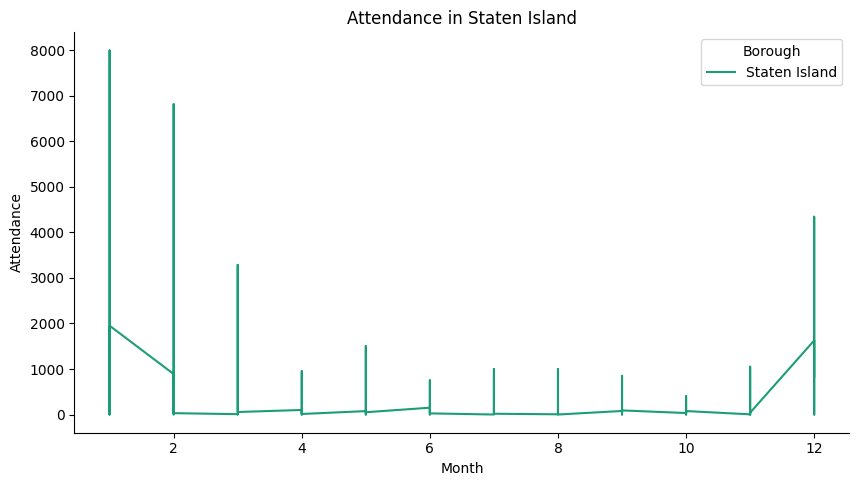

In [146]:
def _plot_series(series, series_name):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['Month']
    ys = series['Attendance']

    plt.plot(xs, ys, label=series_name, color=palette[0])  # Use a single color for each figure

df_sorted = df.sort_values('Month', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Borough')):
    plt.figure(figsize=(10, 5.2))
    _plot_series(series, series_name)
    plt.title(f'Attendance in {series_name}')
    sns.despine()
    plt.xlabel('Month')
    plt.ylabel('Attendance')
    plt.legend(title='Borough')
    plt.show()
